## KNN (K Nearest Neighbour)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd


In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train and test split Data

In [11]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 30)

print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [12]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
59,5.2,2.7,3.9,1.4
94,5.6,2.7,4.2,1.3
73,6.1,2.8,4.7,1.2
89,5.5,2.5,4.0,1.3
88,5.6,3.0,4.1,1.3
...,...,...,...,...
53,5.5,2.3,4.0,1.3
130,7.4,2.8,6.1,1.9
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3


### Apply KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Make Prediction and evaluate

In [14]:
from sklearn.metrics import accuracy_score,classification_report

y_pred = model.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.85      0.88        13
           2       0.90      0.95      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [17]:
print(f"y_test:\n",y_test)
print(f"\n\ny_pred:\n",y_pred)

y_test:
 20     0
5      0
3      0
101    2
82     1
80     1
123    2
145    2
74     1
107    2
38     0
103    2
93     1
99     1
8      0
97     1
32     0
1      0
24     0
72     1
133    2
42     0
0      0
35     0
105    2
132    2
70     1
136    2
2      0
87     1
139    2
81     1
112    2
127    2
118    2
141    2
98     1
137    2
71     1
129    2
143    2
128    2
14     0
68     1
111    2
Name: target, dtype: int32


y_pred:
 [0 0 0 2 1 1 2 2 1 2 0 2 1 1 0 1 0 0 0 2 1 0 0 0 2 2 2 2 0 1 2 1 2 2 2 2 1
 2 1 2 2 2 0 1 2]


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

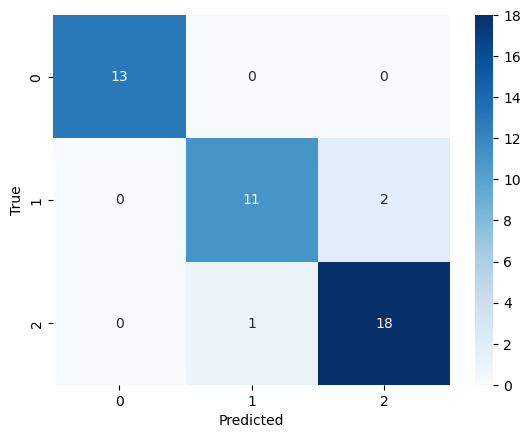

In [21]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()